# 911 Calls Analysis

911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
# Display dataset information such as column names, data types, and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Top 5 zipcodes for 911 calls

In [5]:
# Checking for missing values in the dataset

df.isna().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [6]:
# Top 5 zip codes where most 911 calls were made

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships (twp) for 911 calls

In [7]:
# Top 5 townships (twp) with the most 911 calls

df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Unique title codes

In [8]:
# Number of unique emergency titles (different types of 911 calls)

df['title'].nunique()

110

## Creating new features

Creating a new column called "Reason"

In [10]:
def Reason(text):
    text1 = text.split(':')
    
    return text1[0]

df['Reason'] = df['title'].apply(lambda x: Reason(x))

df[['title','Reason']].head(5)

,title,Reason
0,EMS: BACK PAINS/INJURY,EMS
1,EMS: DIABETIC EMERGENCY,EMS
2,Fire: GAS-ODOR/LEAK,Fire
3,EMS: CARDIAC EMERGENCY,EMS
4,EMS: DIZZINESS,EMS


In [11]:
# Count of 911 calls by Reason (EMS, Fire, Traffic)

df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

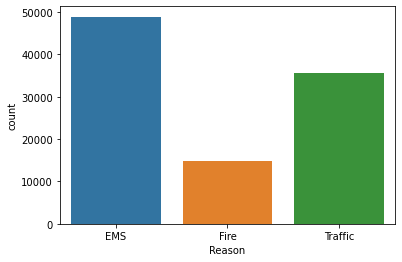

In [12]:
# Plot the count of 911 calls categorized by Reason

sns.countplot('Reason', data = df)

In [267]:
type(df['timeStamp'].iloc[0])

str

In [13]:
# Converting the 'timeStamp' column to datetime format

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [269]:
time = df['timeStamp'].iloc[0]
time.day

10

In [14]:
# Extracting hour, month, and day of the week from the timestamp

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x : x.month)
df['day'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['day'] = df['day'].map(dmap)

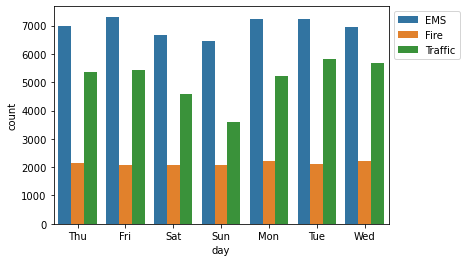

In [16]:
# Countplot of calls by day of the week, with hue based on Reason

sns.countplot(x = 'day',data = df, hue = 'Reason')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

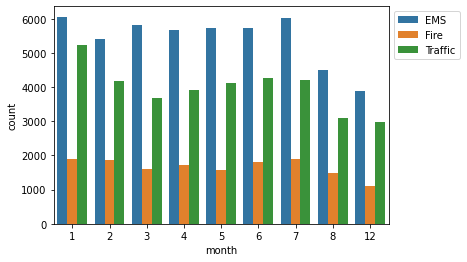

In [17]:
# Countplot of calls by month, with hue based on Reason

sns.countplot(x = 'month',data = df, hue = 'Reason')
plt.legend(loc = 'upper left',bbox_to_anchor=(1, 1) )

In [18]:
# Creating a grouped DataFrame to count the number of calls per month

byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


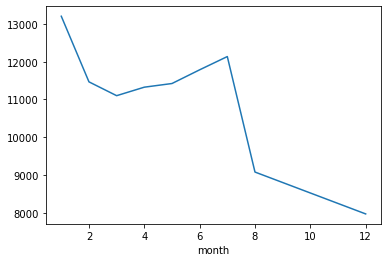

In [19]:
# Line plot of number of calls per month

byMonth['lat'].plot()

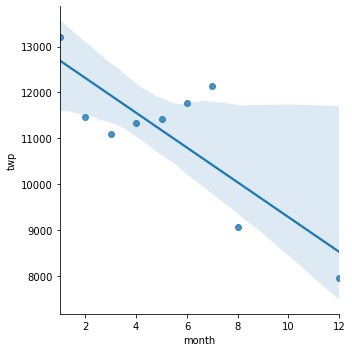

In [20]:
# Performing a linear fit to see the trend of calls per month

sns.lmplot(x = 'month',y = 'twp', data = byMonth.reset_index())

In [276]:
t = df['timeStamp'].iloc[0]
t.date()

datetime.date(2015, 12, 10)

In [21]:
# Extracting the date from the timestamp

df['date'] = df['timeStamp'].apply(lambda x: x.date())

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


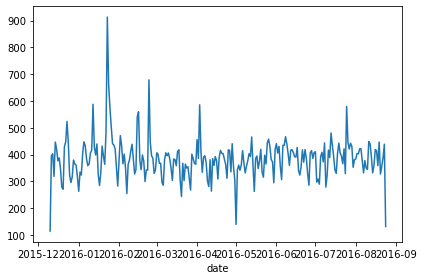

In [23]:
# Line plot of the total number of 911 calls per day

df.groupby('date').count()['lat'].plot()
plt.tight_layout()

Creating separate plots for each type of emergency (Traffic, Fire, EMS)

Text(0.5, 1.0, 'Traffic')

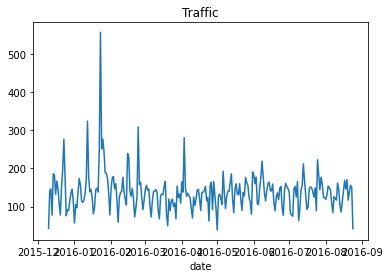

In [25]:
df[df['Reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')

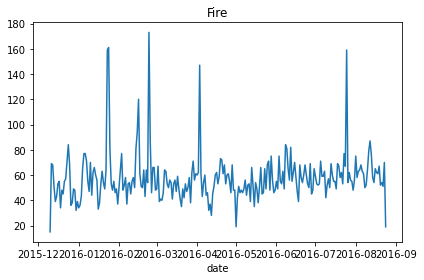

In [281]:
df[df['Reason']=='Fire'].groupby('date')['lat'].count().plot()
plt.title('Fire')
plt.tight_layout()

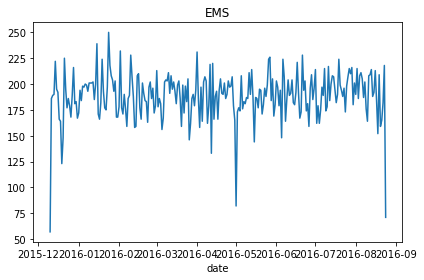

In [282]:
df[df['Reason']=='EMS'].groupby('date')['lat'].count().plot()
plt.title('EMS')
plt.tight_layout()

In [28]:
# Creating a pivot table to analyze calls by day and hour

new = df.groupby(by=['day','hour']).count()['Reason'].unstack()
new

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


HeatMap using this new DataFrame 'new'

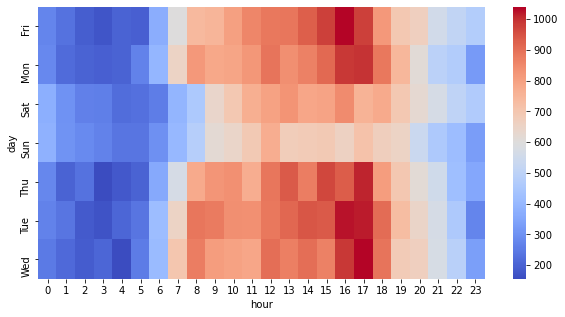

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(new, cmap = 'coolwarm')
plt.show()

<Figure size 1008x720 with 0 Axes>

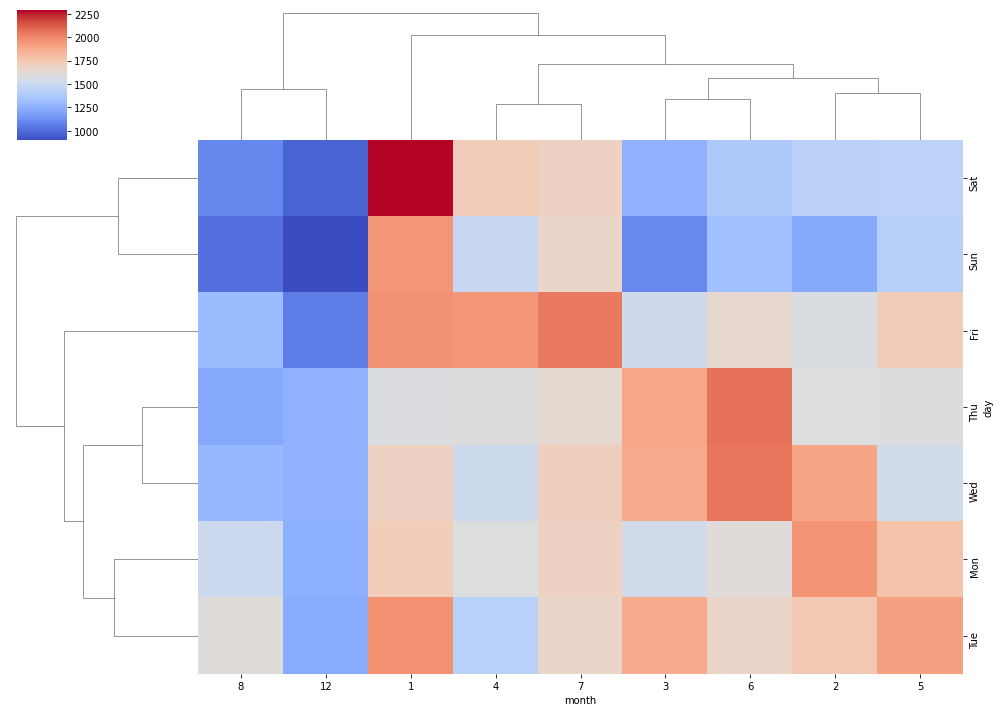

In [55]:
# Clustermap to identify patterns in 911 calls based on time

plt.figure(figsize=(14, 10))
sns.clustermap(new2, cmap='coolwarm', figsize=(14, 10))
plt.show()

In [29]:
# Creating a new pivot table to analyze calls by day and month

new2 = df.groupby(by=['day','month']).count()['Reason'].unstack()
new2

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


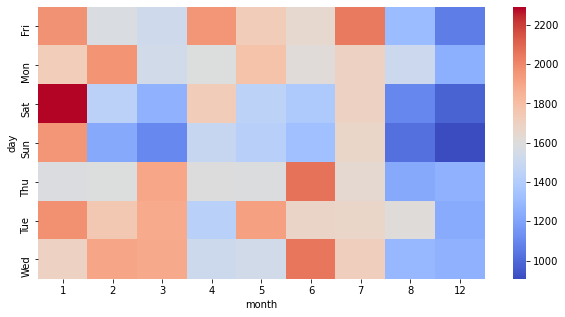

In [30]:
# Heatmap to visualize the frequency of calls by day and month

plt.figure(figsize = (10,5))
sns.heatmap(new2, cmap = 'coolwarm')

<Figure size 1008x720 with 0 Axes>

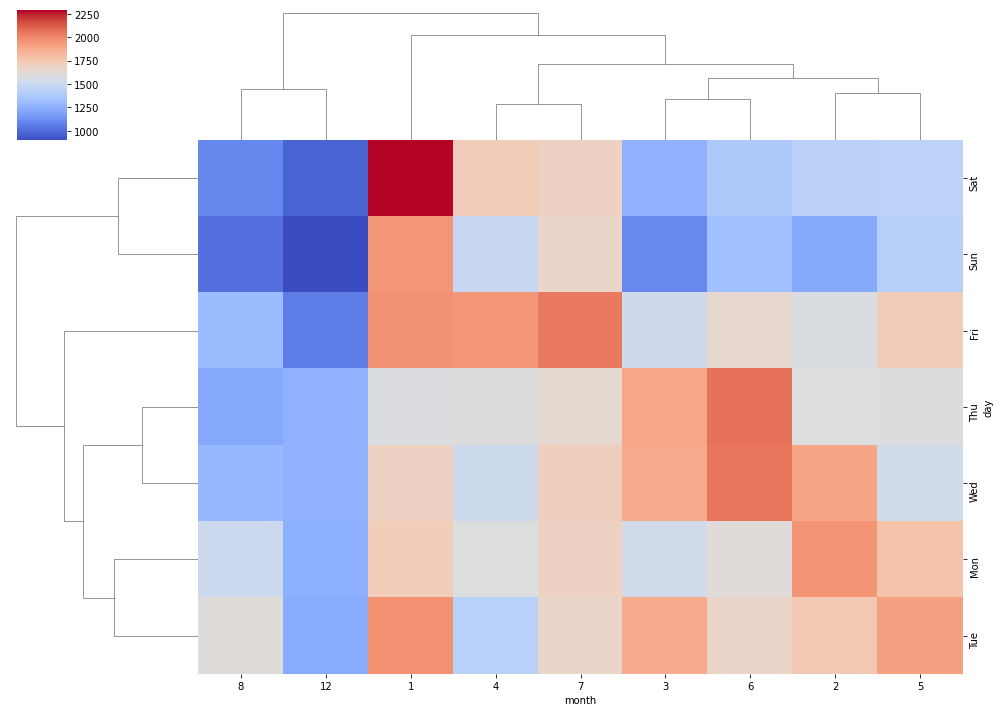

In [49]:
# Clustermap to identify patterns in 911 calls based on months

plt.figure(figsize=(14, 10))
sns.clustermap(new2, cmap='coolwarm', figsize=(14, 10))
plt.show()